In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
A, B = 0, 1
eps = 1e-2

X = np.arange(0, 1, 1e-5)

## Прогонка

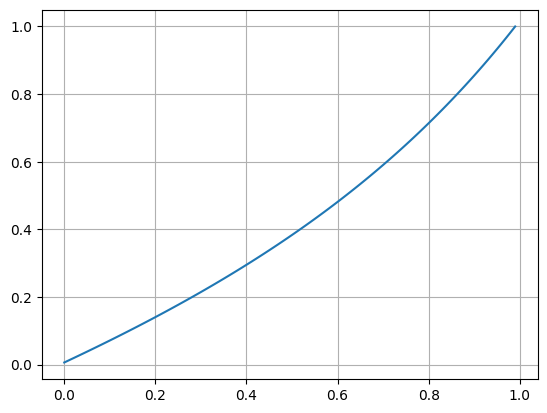

In [63]:
a2 = lambda x: eps
a1 = lambda x: 2*x + 1
a0 = lambda x: -2

def coef(x_0, alpha_0, beta_0, dx, n):
    xs, alpha, beta = [x_0], [alpha_0], [beta_0]
    A = lambda x: a0(x)/dx**2 + a1(x)/dx
    B = lambda x: -2*a0(x)/dx**2 -a1(x)/dx + a2(x)
    C = lambda x: a0(x)/dx**2
    for i in range(1, n):
        d = B(xs[-1]+dx) + C(xs[-1]+dx)*alpha[-1]
        alpha.append(-A(xs[-1]+dx) / d)
        beta.append(-C(xs[-1]+dx) * beta[-1] / d)
        xs.append(xs[-1] + dx)
    
    return xs, alpha, beta

def solve(alpha, beta, n, y_n):
    y = [0] * (n-1) + [y_n]
    for i in range(n-1, 0, -1):
        y[i-1] = (alpha[i]*y[i]+beta[i])
    return y

x, alpha, beta = coef(0, 0, A, eps, int(1/eps))
y = solve(alpha, beta, len(alpha), B)

plt.plot(x, y)
plt.grid(True)
plt.show()

## Прогонка с уплотнением сетки

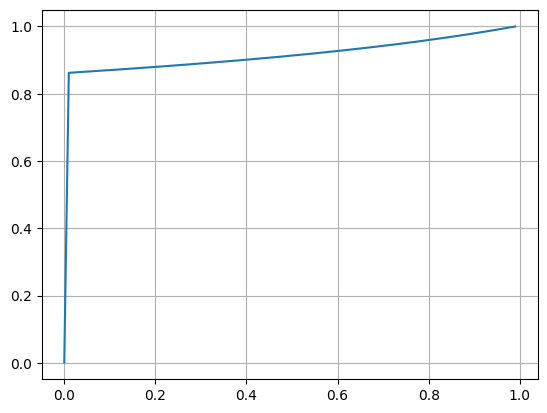

In [64]:
a2 = lambda x: eps
a1 = lambda x: 2*x + 1
a0 = lambda x: -2

EPS_TOL = 1e-5

def coef(x_0, alpha_0, beta_0, dx, n):
    xs, alpha, beta = [x_0], [alpha_0], [beta_0]
    A = lambda x: a0(x)/dx**2 + a1(x)/dx
    B = lambda x: -2*a0(x)/dx**2 -a1(x)/dx + a2(x)
    C = lambda x: a0(x)/dx**2
    for i in range(1, n):
        d = B(xs[-1]+dx) + C(xs[-1]+dx)*alpha[-1]
        alpha.append(-A(xs[-1]+dx) / d)
        beta.append(-C(xs[-1]+dx) * beta[-1] / d)
        xs.append(xs[-1] + dx)
    
    return xs, alpha, beta

def solve(alpha, beta, n, y_n):
    y = [0] * (n-1) + [y_n]
    for i in range(n-1, 0, -1):
        y[i-1] = (alpha[i]*y[i]+beta[i])
    return y

x_eps, alpha_eps, beta_eps = coef(0, 0, A, EPS_TOL, int(eps/EPS_TOL))
x_main, alpha_main, beta_main = coef(x_eps[-1], alpha_eps[-1], beta_eps[-1], eps, int((1 - 1e-6) / eps))

y_main = solve(alpha_main, beta_main, len(alpha_main), B)
y_eps = solve(alpha_eps, beta_eps, len(alpha_eps), y_main[0])

plt.plot(np.concat((x_eps[:-1], x_main)), np.concat((y_eps[:-1], y_main)))
plt.grid(True)
plt.show()

## SciPy

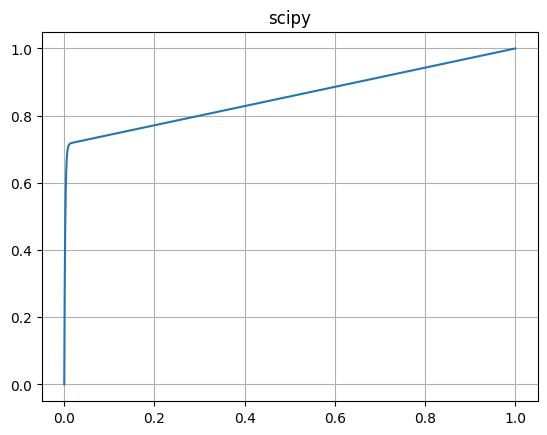

In [65]:
from scipy.integrate import solve_bvp


def ode_system(x, y):
    y1, y2 = y
    return np.vstack((
        y2,
        -((2*x + 5)*y2 - 2*y1) / eps
    ))

def boundary_conditions(ya, yb):
    return np.array([ya[0] - 0, yb[0] - 1])


y_guess = np.zeros((2, X.size))
solution = solve_bvp(ode_system, boundary_conditions, X, y_guess)

plt.plot(solution.x, solution.y[0])
plt.title('scipy')
plt.grid(True)
plt.show()

## Аналитика

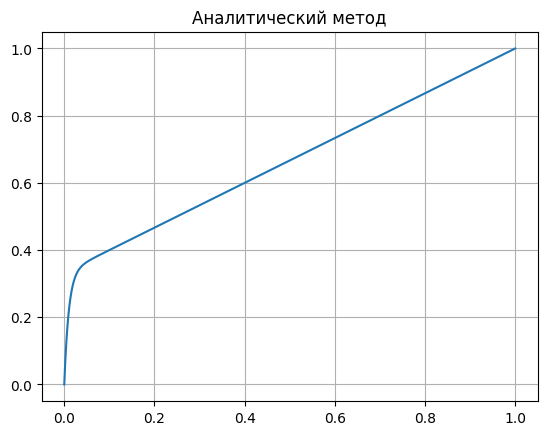

In [66]:
def y(x):
    return B/3*(2*x+1) + (A - B/3)*np.exp(-x/eps)

Y = y(X)
plt.plot(X, Y)
plt.title('Аналитический метод')
plt.grid()
plt.show()
